## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [20]:
import pandas as pd
dataset = pd.read_csv("titanic.csv")

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [21]:
import pandas as pd

total_male = dataset['Sex'].value_counts().get('male', 0)
total_female = dataset['Sex'].value_counts().get('female', 0)

survived_male_count = dataset[(dataset['Survived'] == 1) & (dataset['Sex'] == 'male')].shape[0]
survived_female_count =  dataset[(dataset['Survived'] == 1) & (dataset['Sex'] == 'female')].shape[0]

if total_male != 0:
    percent_survived_male = "{:.2f}%".format((survived_male_count / total_male) * 100)
else:
    percent_survived_male = "No male passengers"
    
if total_female != 0:
    percent_survived_female = "{:.2f}%".format((survived_female_count / total_female) * 100)
else:
    percent_survived_female = "No female passengers"

print('Percent survived of male:', percent_survived_male)
print('Percent survived of female:', percent_survived_female)


Percent survived of male: 18.89%
Percent survived of female: 74.20%


**Задача 2:** Відтворіть ці графіки  
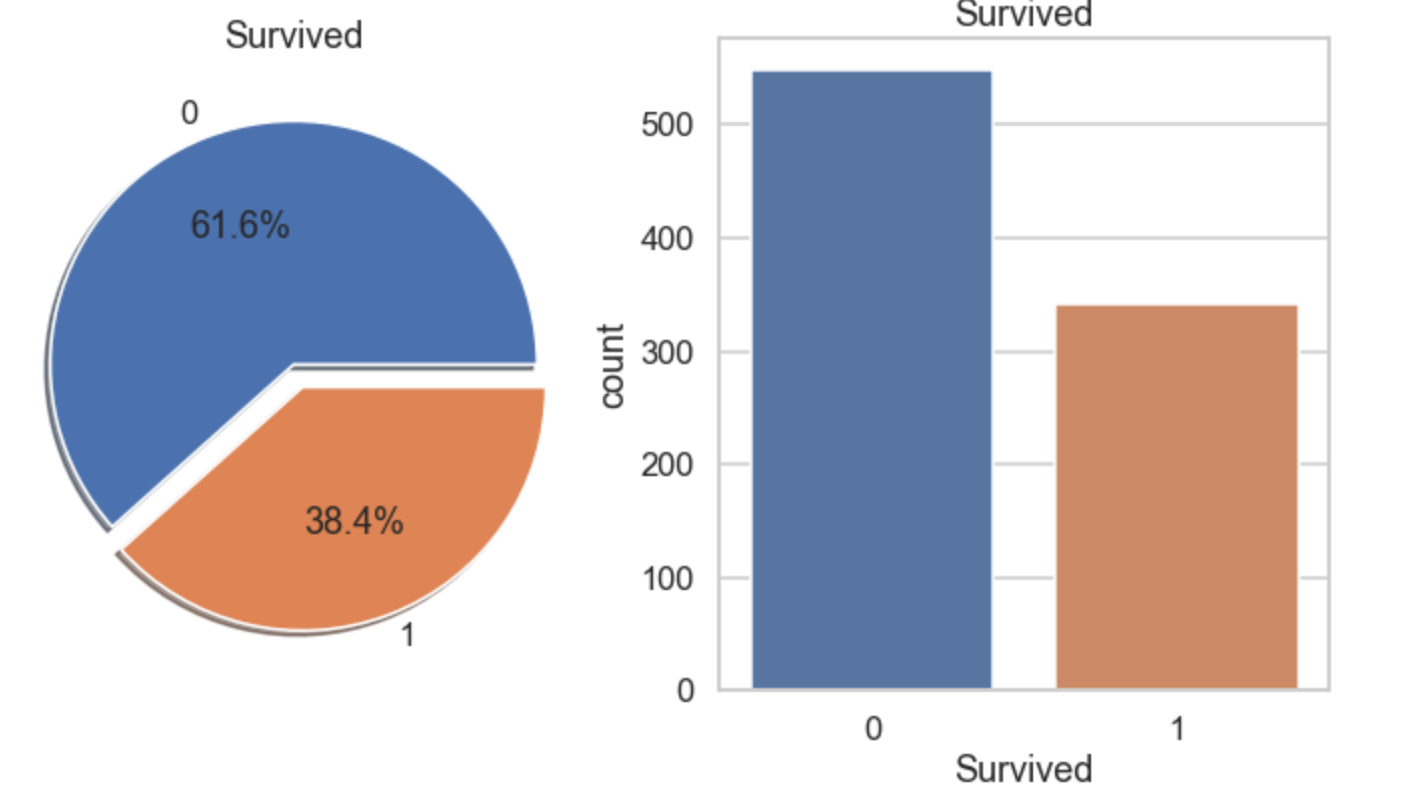


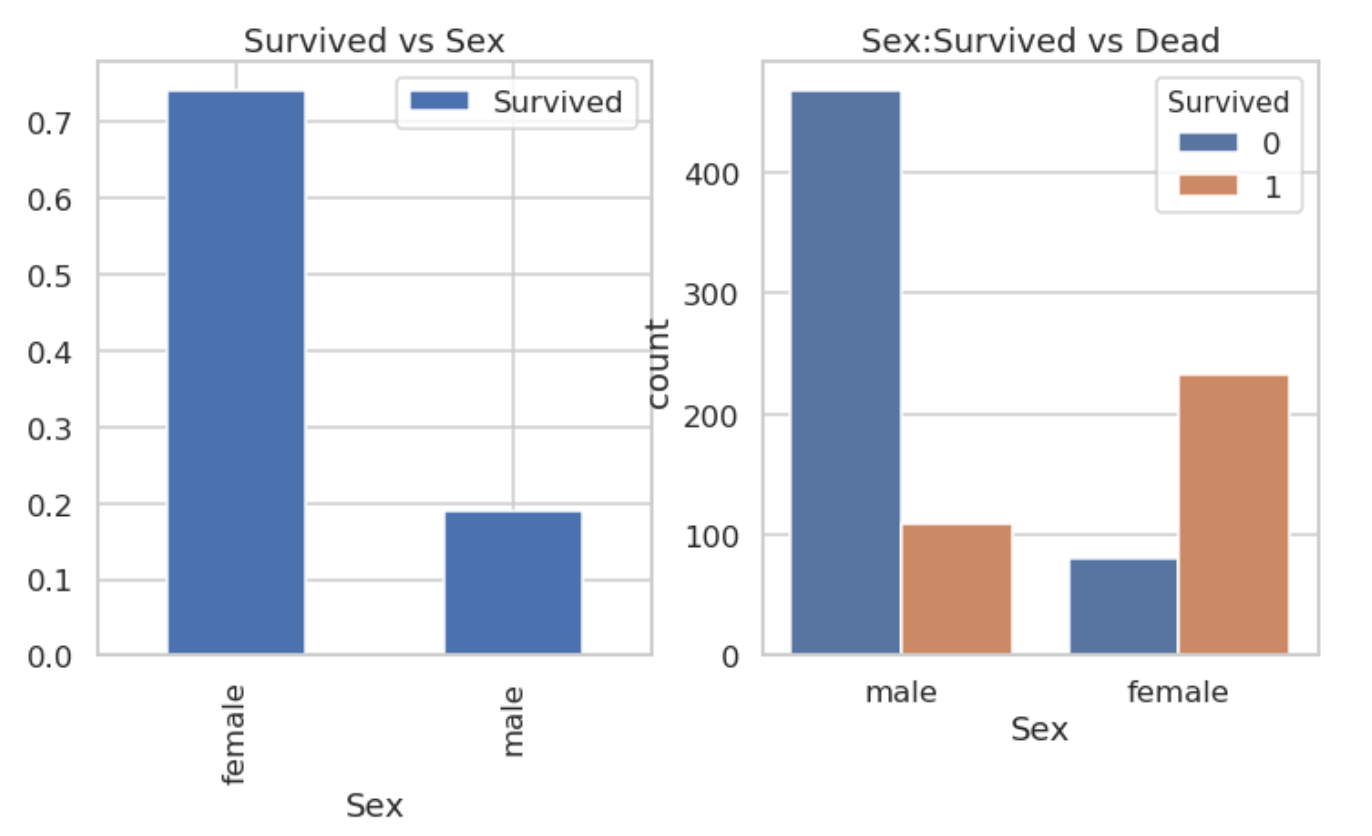

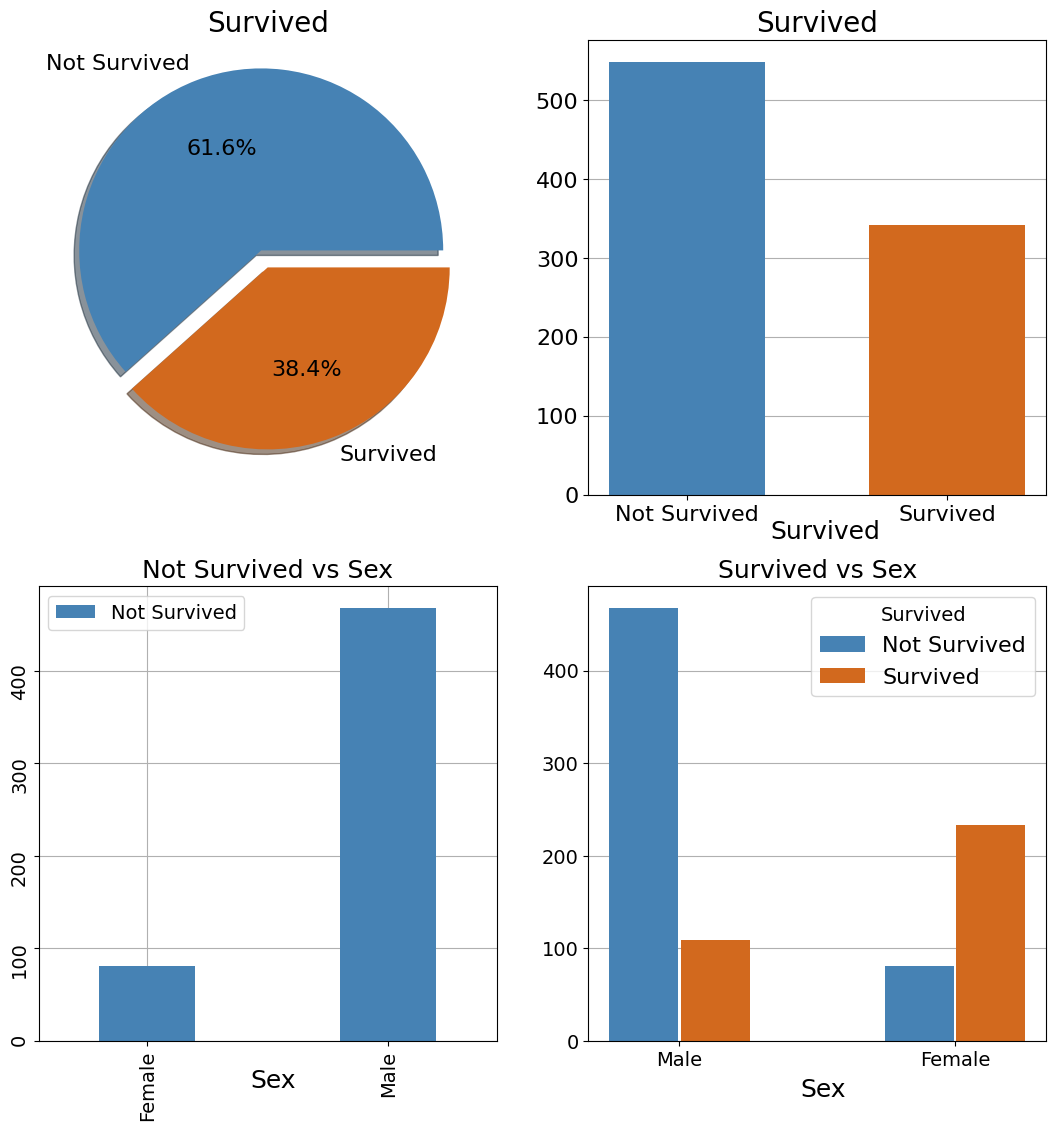

In [22]:
import matplotlib.pyplot as plt
import numpy as np

survived_count = dataset['Survived'].value_counts()[1]
not_survived_count = dataset['Survived'].value_counts()[0]

not_survived_male_count = dataset[(dataset['Survived'] == 0) & (dataset['Sex'] == 'male')].shape[0]
not_survived_female_count = dataset[(dataset['Survived'] == 0) & (dataset['Sex'] == 'female')].shape[0]

fig, ax = plt.subplots(2, 2, figsize=(13, 13))

ax[0, 0].pie([not_survived_count, survived_count], labels=["Not Survived", "Survived"], explode=[0.1, 0], shadow=True, colors=["steelblue", "chocolate"], autopct='%1.1f%%', textprops={'fontsize': 16})
ax[0, 0].set_title("Survived", size=20)

ax[0, 1].bar(["Not Survived", "Survived"], [not_survived_count, survived_count], width=0.6, color=["steelblue", "chocolate"])
ax[0, 1].set_title("Survived", size=20)
ax[0, 1].text(0.32, -55, "Survived", size=18)
ax[0, 1].tick_params(labelsize=16)
ax[0, 1].grid(axis="y")
ax[0, 1].set_axisbelow(True)

ax[1, 0].bar(["Female", "Male"], [not_survived_female_count, not_survived_male_count], width=0.4, color=["steelblue"])
ax[1, 0].set_title("Not Survived vs Sex", size=18)
ax[1, 0].text(0.43, -50, "Sex", size=18)
ax[1, 0].tick_params(labelsize=14, labelrotation=90)
ax[1, 0].legend(["Not Survived"], fontsize=14)
ax[1, 0].grid()
ax[1, 0].set_axisbelow(True)
ax[1, 0].set_xlim([-0.45, 1.45])

ax[1, 1].bar(["Male", "Female"], [not_survived_male_count, not_survived_female_count], width=0.25, color=["steelblue"])
ax[1, 1].bar(np.arange(2) + 0.26, [survived_male_count, survived_female_count], width=0.25, color=["chocolate"])
ax[1, 1].set_title("Survived vs Sex", size=18)
ax[1, 1].text(0.57, -60, "Sex", size=18)
ax[1, 1].tick_params(labelsize=14)
ax[1, 1].legend(["Not Survived", "Survived"], title="Survived", fontsize=16, title_fontsize=14)
ax[1, 1].grid(axis="y")
ax[1, 1].set_axisbelow(True)
ax[1, 1].set_xticks(np.arange(2) + 0.26 - 0.130)
ax[1, 1].set_xticklabels(["Male", "Female"])

plt.show()


Перший графік показує на круговій діаграмі відсотки виживших (38.4%) та загиблих (61.6%) людей на Титаніку.

Другий графік представляє кількість виживших та загиблих людей на стовпчастій діаграмі, де синя колонка відображає загиблих, а помаранчева - виживших. Загиблих більше, ніж виживших.

Третій графік показує кількість виживших чоловіків та жінок на стовпчастій діаграмі. Як видно, вижило більше жінок, ніж чоловіків.

Четвертий графік демонструє кількість виживших та загиблих серед чоловіків та жінок на стовпчастій діаграмі. У чоловіків більше загиблих, ніж виживших, тоді як у жінок спостерігається навпаки - більше виживших, ніж загиблих.

Прокоментуйте побудовані графіки

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [23]:
print(dataset.isnull().sum().sum())

866


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [24]:
dataset['first_name'] = dataset['Name'].str.extract('(Mr\\. |Miss\\. |Master. |Mrs\\.[A-Za-z]*\\()([A-Za-z]*)')[1]
most_popular_female_name = dataset.loc[dataset['Sex'] == 'female', 'first_name'].value_counts()

most_popular_female_name = most_popular_female_name[most_popular_female_name > 1]
print("Most popular female name:", most_popular_female_name.index[0])


Most popular female name: Anna


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [25]:
dataset['first_name'] = dataset['Name'].str.extract('(Mr\\. |Miss\\. |Master. |Mrs\\.[A-Za-z]*\\()([A-Za-z]*)')[1]
most_popular_female_name = dataset.loc[dataset['Sex'] == 'male', 'first_name'].value_counts()

most_popular_female_name = most_popular_female_name[most_popular_female_name > 1]
print("Most popular female name:", most_popular_female_name.index[0])

Most popular female name: William


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
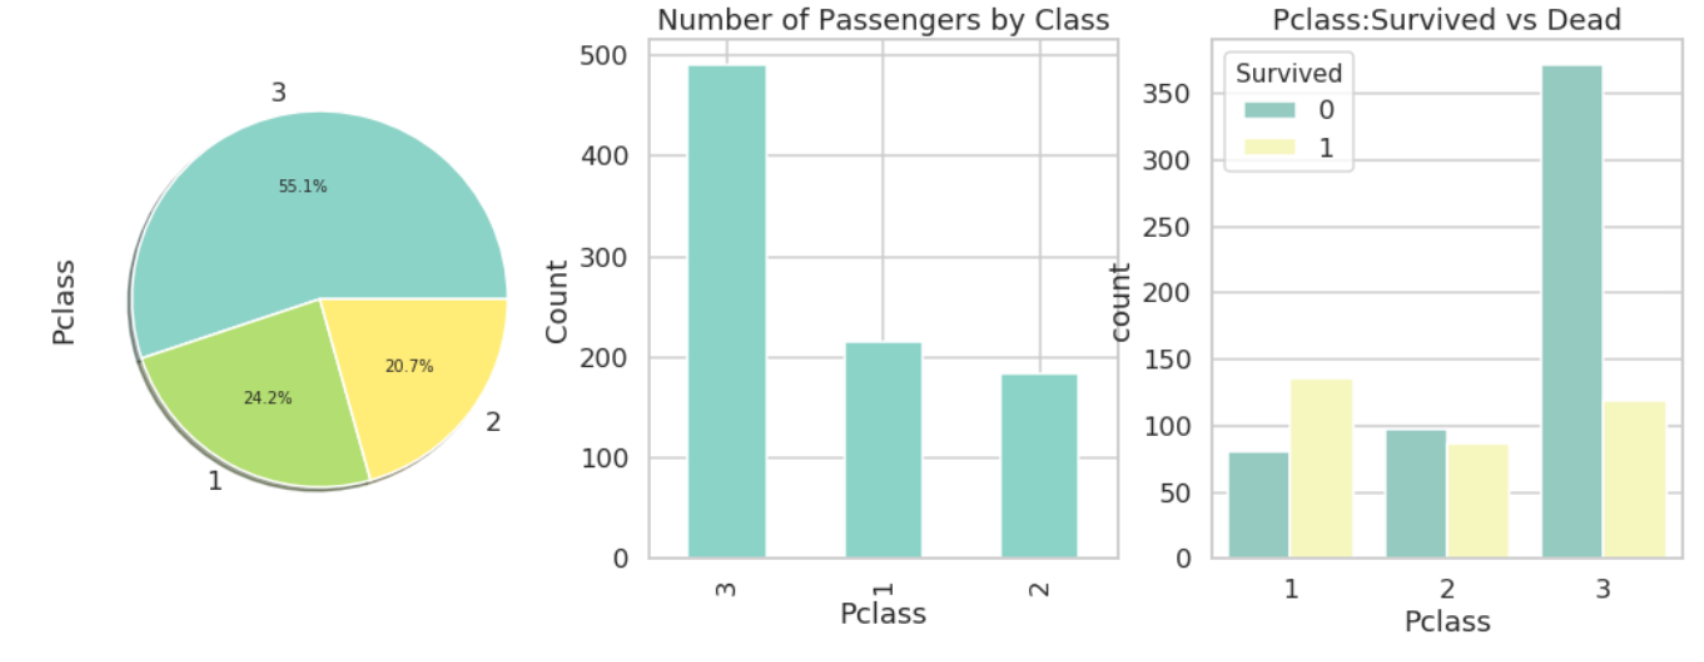

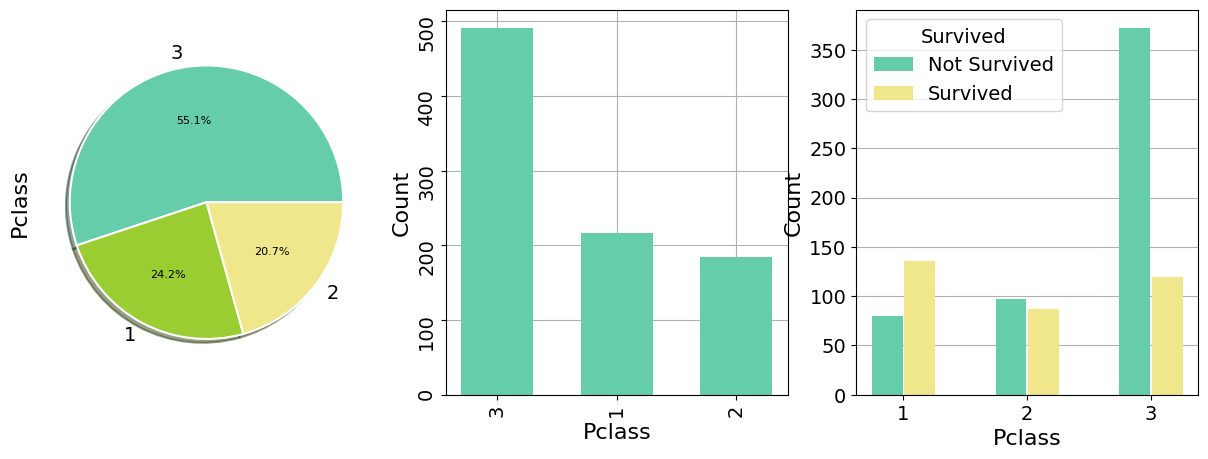

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

first_pclass = dataset[dataset['Pclass'] == 1].shape[0]
second_pclass = dataset[dataset['Pclass'] == 2].shape[0]
third_pclass = dataset[dataset['Pclass'] == 3].shape[0]

survived_first_pclass = dataset[(dataset['Pclass'] == 1) & (dataset['Survived'] == 1)].shape[0]
survived_second_pclass = dataset[(dataset['Pclass'] == 2) & (dataset['Survived'] == 1)].shape[0]
survived_third_pclass = dataset[(dataset['Pclass'] == 3) & (dataset['Survived'] == 1)].shape[0]

not_survived_first_pclass = dataset[(dataset['Pclass'] == 1) & (dataset['Survived'] == 0)].shape[0]
not_survived_second_pclass = dataset[(dataset['Pclass'] == 2) & (dataset['Survived'] == 0)].shape[0]
not_survived_third_pclass = dataset[(dataset['Pclass'] == 3) & (dataset['Survived'] == 0)].shape[0]

patches, texts, autotexts = ax[0].pie([third_pclass, first_pclass, second_pclass], labels=["3", "1", "2"], wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}, shadow=True, colors=["mediumaquamarine", "yellowgreen", "khaki"], autopct='%1.1f%%', textprops={'fontsize': 14})
ax[0].set_ylabel("Pclass", size=16)

for autotext in autotexts:
    autotext.set_fontsize(8)

ax[1].bar(["3", "1", "2"], [third_pclass, first_pclass, second_pclass], width=0.6, color=["mediumaquamarine"])
ax[1].set_xlabel("Pclass", size=16)
ax[1].set_ylabel("Count", size=16)
ax[1].tick_params(labelsize=14, labelrotation=90)
ax[1].grid()
ax[1].set_axisbelow(True)

ax[2].bar(["1", "2", "3"], [not_survived_first_pclass, not_survived_second_pclass, not_survived_third_pclass], width=0.25, color=["mediumaquamarine"])
ax[2].bar(np.arange(3) + 0.26, [survived_first_pclass, survived_second_pclass, survived_third_pclass], width=0.25, color=["khaki"])
ax[2].set_xlabel("Pclass", size=16)
ax[2].set_ylabel("Count", size=16)
ax[2].tick_params(labelsize=14)
ax[2].legend(["Not Survived", "Survived"], title="Survived", fontsize=14, title_fontsize=14)
ax[2].grid(axis="y")
ax[2].set_axisbelow(True)
ax[2].set_xticks(np.arange(3) + 0.26 - 0.130)
ax[2].set_xticklabels(["1", "2", "3"])

plt.show()


Перший графік показує на круговій діаграмі відсотки класу, до якого належить пасажир. Більшість пасажирів належать до 3-го класу (55.1%), до 2-го - 20.7%, а до 1-го - 24.2%.

Другий графік відображає кількість пасажирів за класом на стовпчастій діаграмі. Найбільше пасажирів належать до 3-го класу.

Третій графік показує виживших за класом на стовпчастій діаграмі. Найбільше загиблих пасажирів у 3-му класі, а найбільше виживших - у 1-му класі.

Прокоментуйте побудовані графіки

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
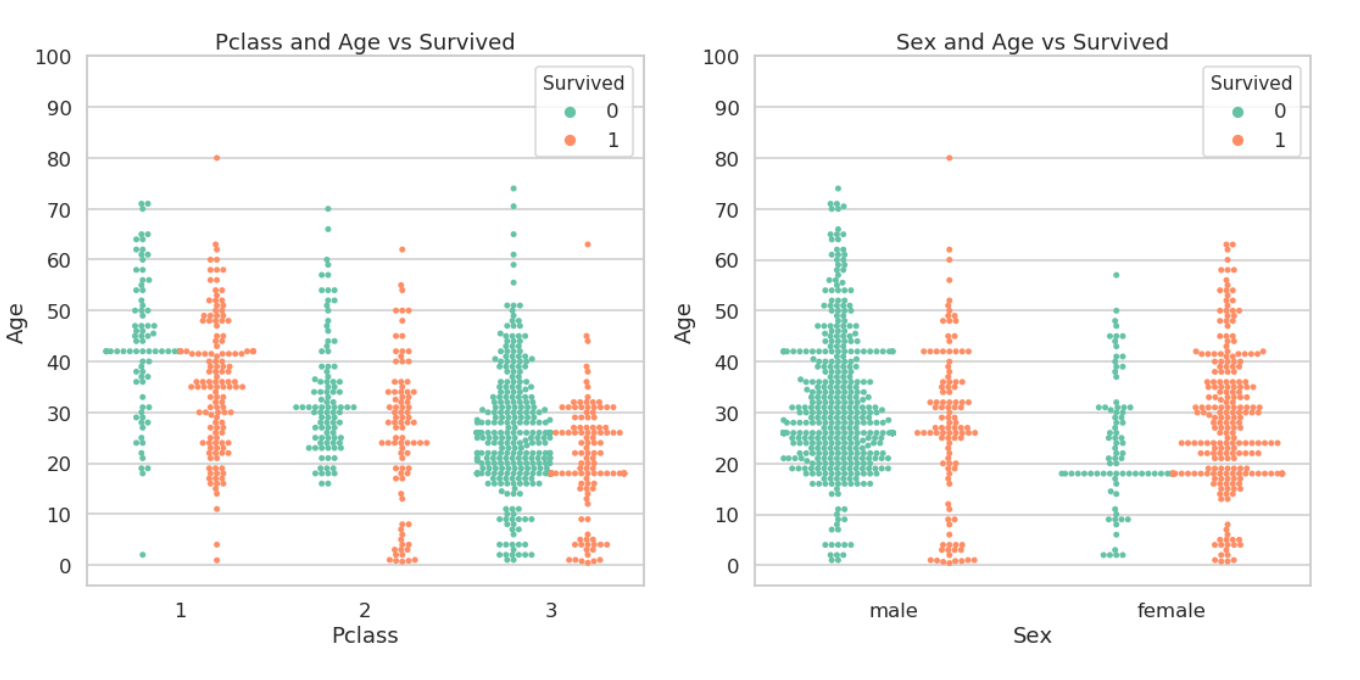![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

C:\Users\apavl\AppData\Local\Temp\ipykernel_7308\1561244395.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['1', '2', '3'])
C:\Users\apavl\AppData\Local\Temp\ipykernel_7308\1561244395.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['male', 'female'])


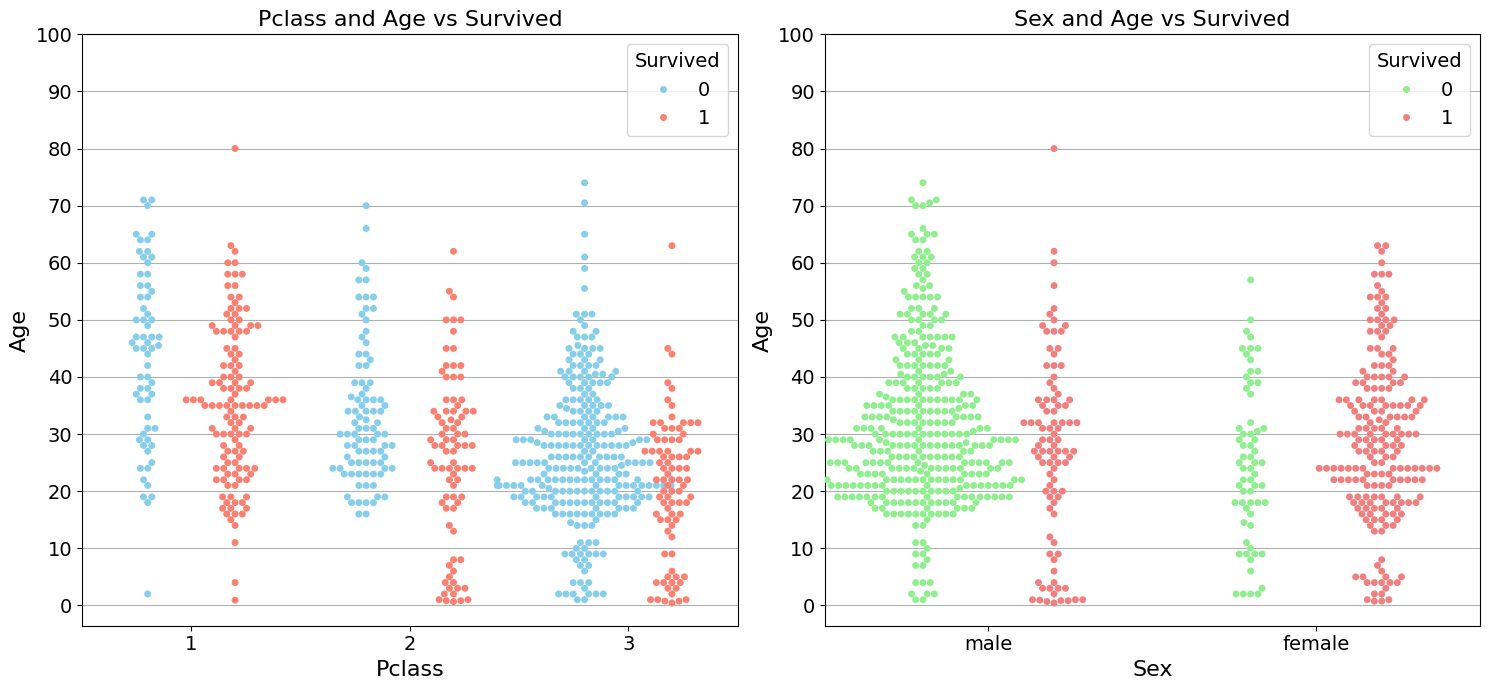

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=dataset, ax=ax[0], palette=['skyblue', 'salmon'], dodge=True, size=5, marker='o')
ax[0].set_title("Pclass and Age vs Survived", size=16)
ax[0].set_xlabel("Pclass", size=16)
ax[0].set_ylabel("Age", size=16)
ax[0].tick_params(labelsize=14)
ax[0].grid(axis="y")
ax[0].set_axisbelow(True)
ax[0].set_yticks(np.arange(0, 110, 10))
ax[0].legend(title="Survived", fontsize=14, title_fontsize=14)
ax[0].set_xticklabels(['1', '2', '3'])
ax[0].set_xlim(-0.5, 2.5)

sns.swarmplot(x='Sex', y='Age', hue='Survived', data=dataset, ax=ax[1], palette=['lightgreen', 'lightcoral'], dodge=True, size=5, marker='o')
ax[1].set_title("Sex and Age vs Survived", size=16)
ax[1].set_xlabel("Sex", size=16)
ax[1].set_ylabel("Age", size=16)
ax[1].tick_params(labelsize=14)
ax[1].grid(axis="y")
ax[1].set_axisbelow(True)
ax[1].set_yticks(np.arange(0, 110, 10))
ax[1].legend(title="Survived", fontsize=14, title_fontsize=14)
ax[1].set_xticklabels(['male', 'female'])
ax[1].set_xlim(-0.5, 1.5)

plt.tight_layout()
plt.show()

Перший графік показує на точковій діаграмі виживших та загиблих пасажирів за віком та класом пасажира. Вісь Y відображає вік пасажирів, вісь X показує клас пасажира.

Другий графік відображає на точковій діаграмі виживших та загиблих пасажирів за статтю та віком. Вісь Y показує вік пасажирів, а вісь X вказує на стать пасажира.

Прокоментуйте побудовані графіки

**Задача 8** Побудуйте наступні діаграми розподілів:  

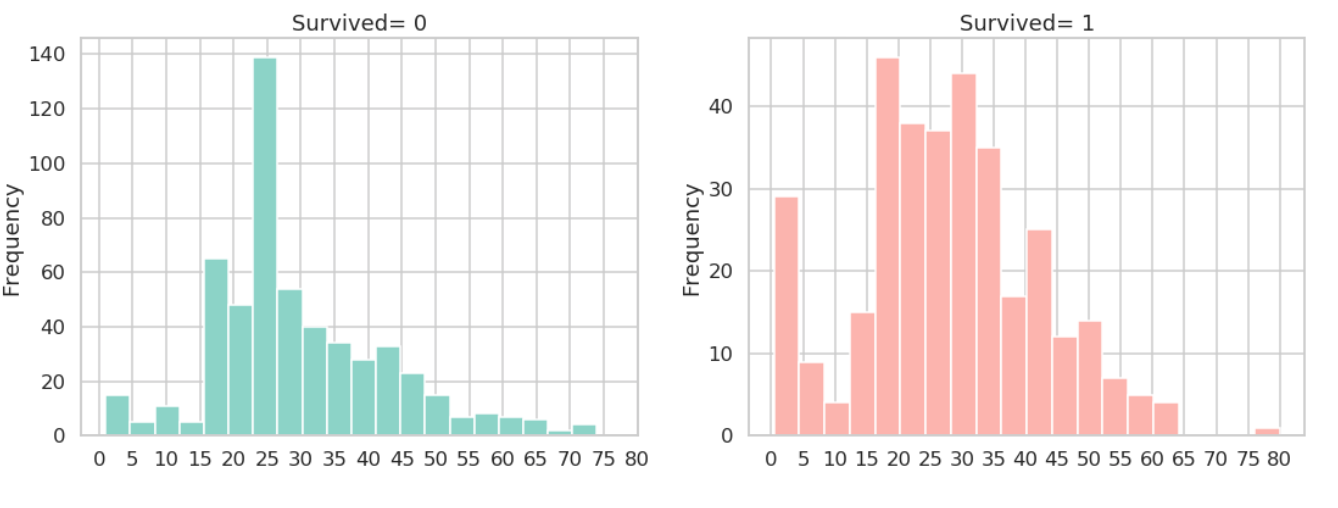



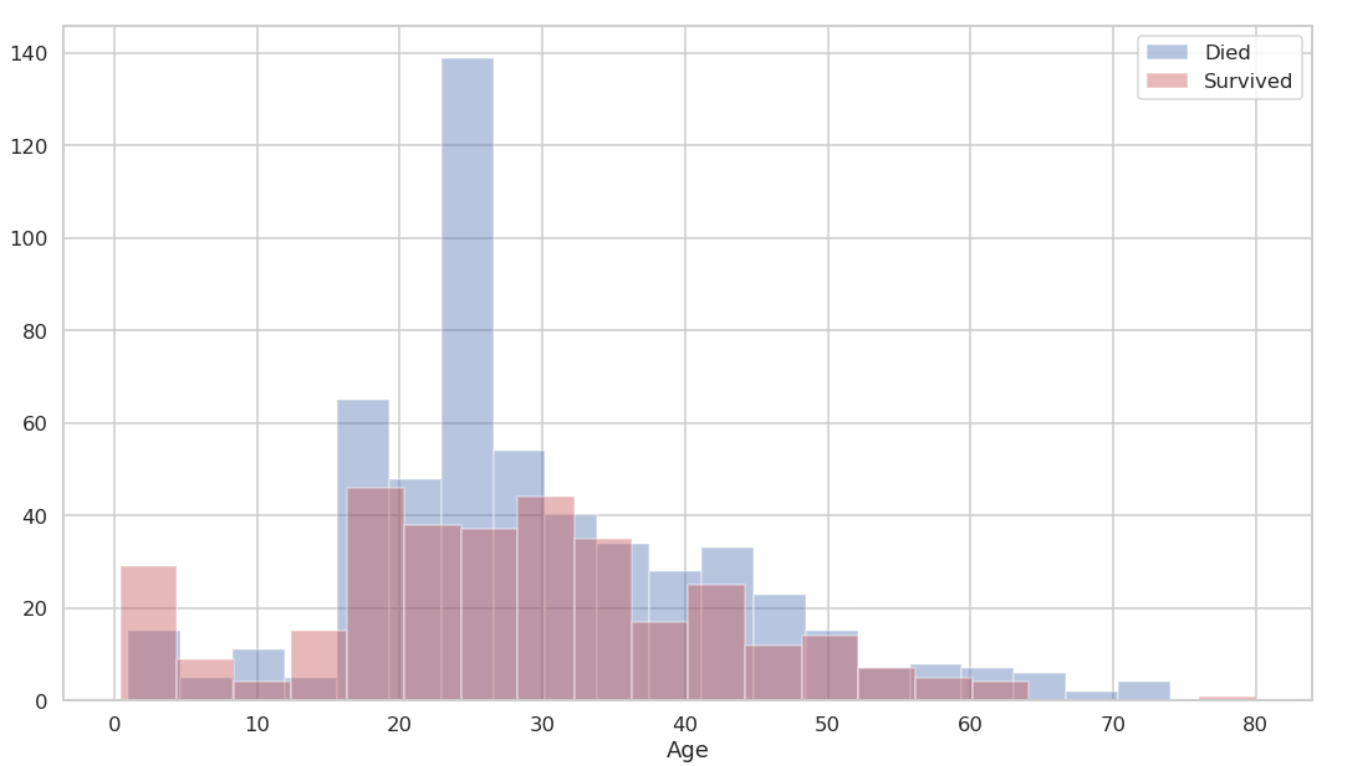

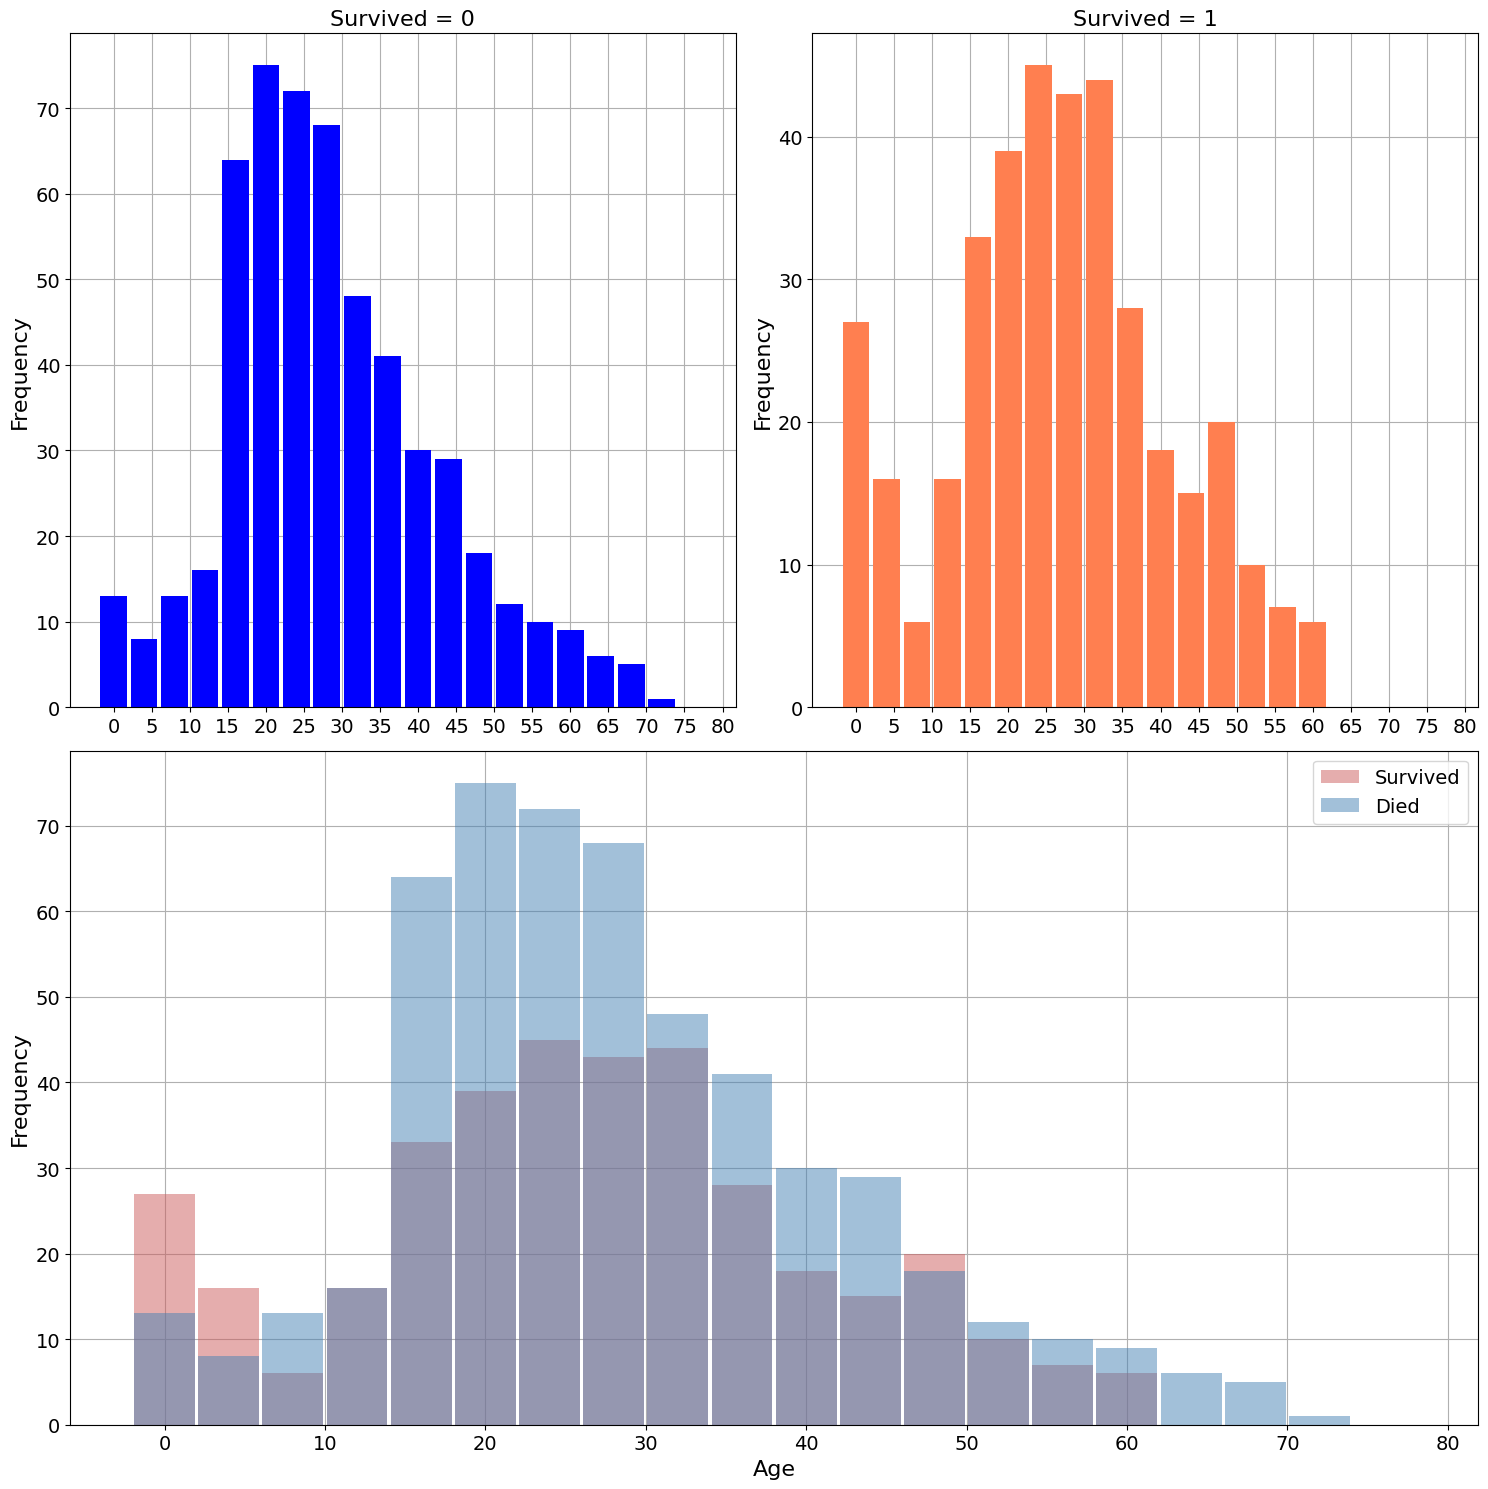

In [34]:
fig = plt.figure(figsize=(15, 15))
ax = fig.subplot_mosaic([["first", "second"],
                         ["third", "third"]])

not_survived_by_age = dataset[(dataset['Survived'] == 0) & (dataset['Age'] >= 0) & (dataset['Age'] <= 75)]['Age']
survived_by_age = dataset[(dataset['Survived'] == 1) & (dataset['Age'] >= 0) & (dataset['Age'] <= 75)]['Age']

x_values = np.arange(0, 80, 4)
not_survived_y = [len(not_survived_by_age[(not_survived_by_age >= i) & (not_survived_by_age < i + 5)]) for i in x_values]
survived_y = [len(survived_by_age[(survived_by_age >= i) & (survived_by_age < i + 5)]) for i in x_values]

custom_ticks = np.arange(0, 85, 5)
custom_labels = [str(i) for i in custom_ticks]

ax["first"].bar(x_values, not_survived_y, width=3.5, color="blue")
ax["first"].set_title("Survived = 0", size=16)
ax["first"].set_ylabel("Frequency", size=16)
ax["first"].set_xticks(custom_ticks)
ax["first"].set_xticklabels(custom_labels)
ax["first"].tick_params(labelsize=14)
ax["first"].grid()
ax["first"].set_axisbelow(True)

ax["second"].bar(x_values, survived_y, width=3.5, color="coral")
ax["second"].set_title("Survived = 1", size=16)
ax["second"].set_ylabel("Frequency", size=16)
ax["second"].set_xticks(custom_ticks)
ax["second"].set_xticklabels(custom_labels)
ax["second"].tick_params(labelsize=14)
ax["second"].grid()
ax["second"].set_axisbelow(True)

ax["third"].bar(x_values, survived_y, width=3.8, color="indianred", alpha=0.5, label='Survived')
ax["third"].bar(x_values, not_survived_y, width=3.8, color="steelblue", alpha=0.5, label='Died')
ax["third"].set_ylabel("Frequency", size=16)
ax["third"].set_xlabel("Age", size=16)
ax["third"].set_xticks(np.arange(0, 90, 10))
ax["third"].tick_params(labelsize=14)
ax["third"].legend(fontsize=14)
ax["third"].grid()
ax["third"].set_axisbelow(True)

plt.tight_layout()
plt.show()


Перший та другий графіки показують розподіл віку серед пасажирів, які вижили та не вижили. Найбільше загиблих пасажирів віком від 17 до 25 років, а найбільше виживших віком від 20 до 30.

Третій графік порівнює загальний розподіл віку серед пасажирів, комбінуючи виживших і загиблих.

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
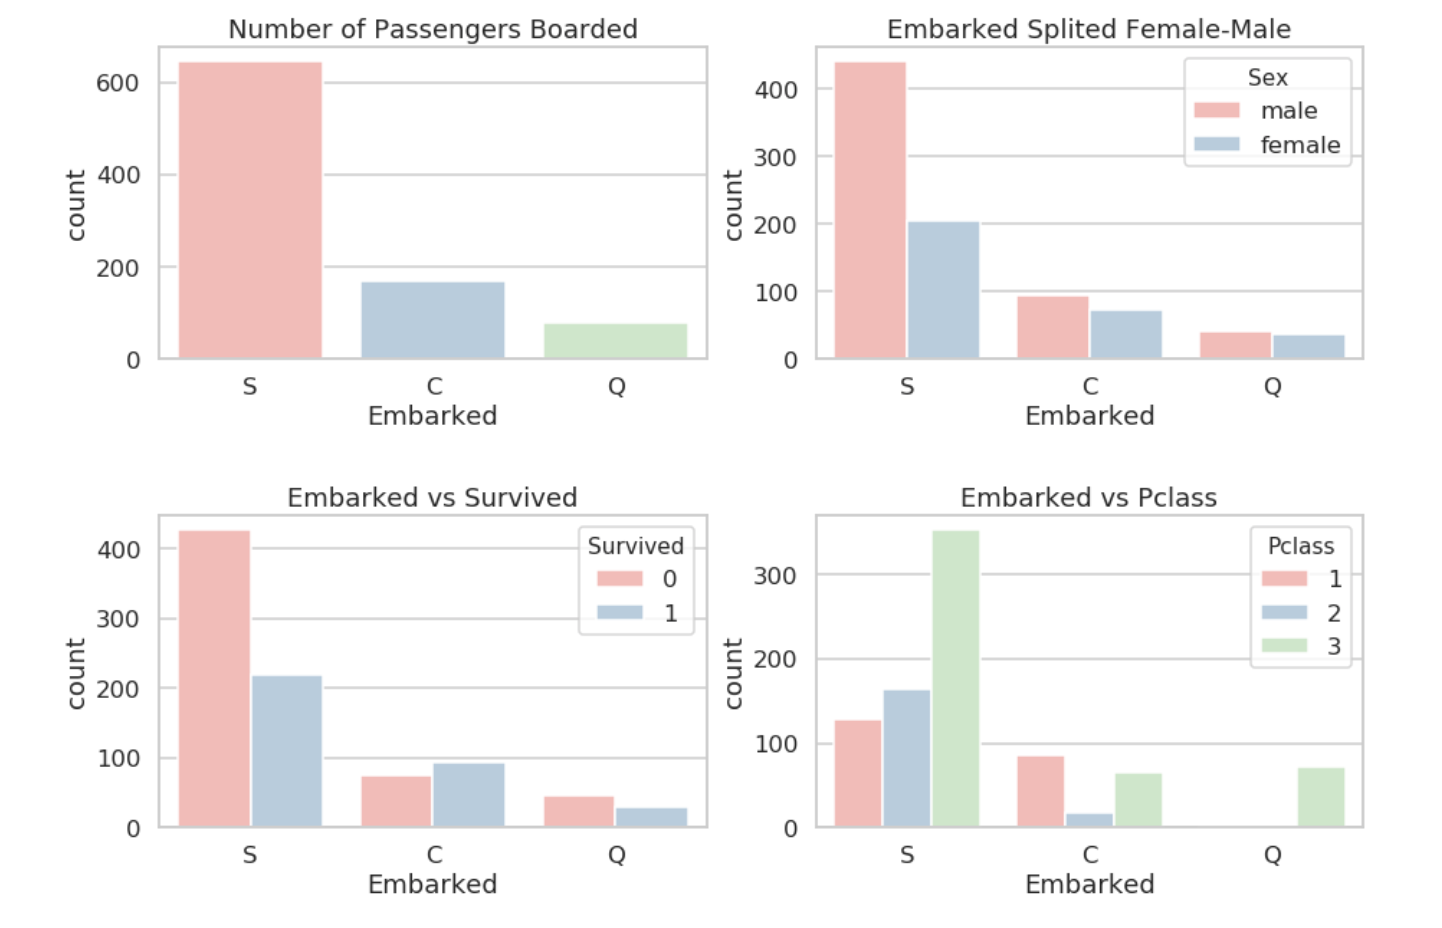

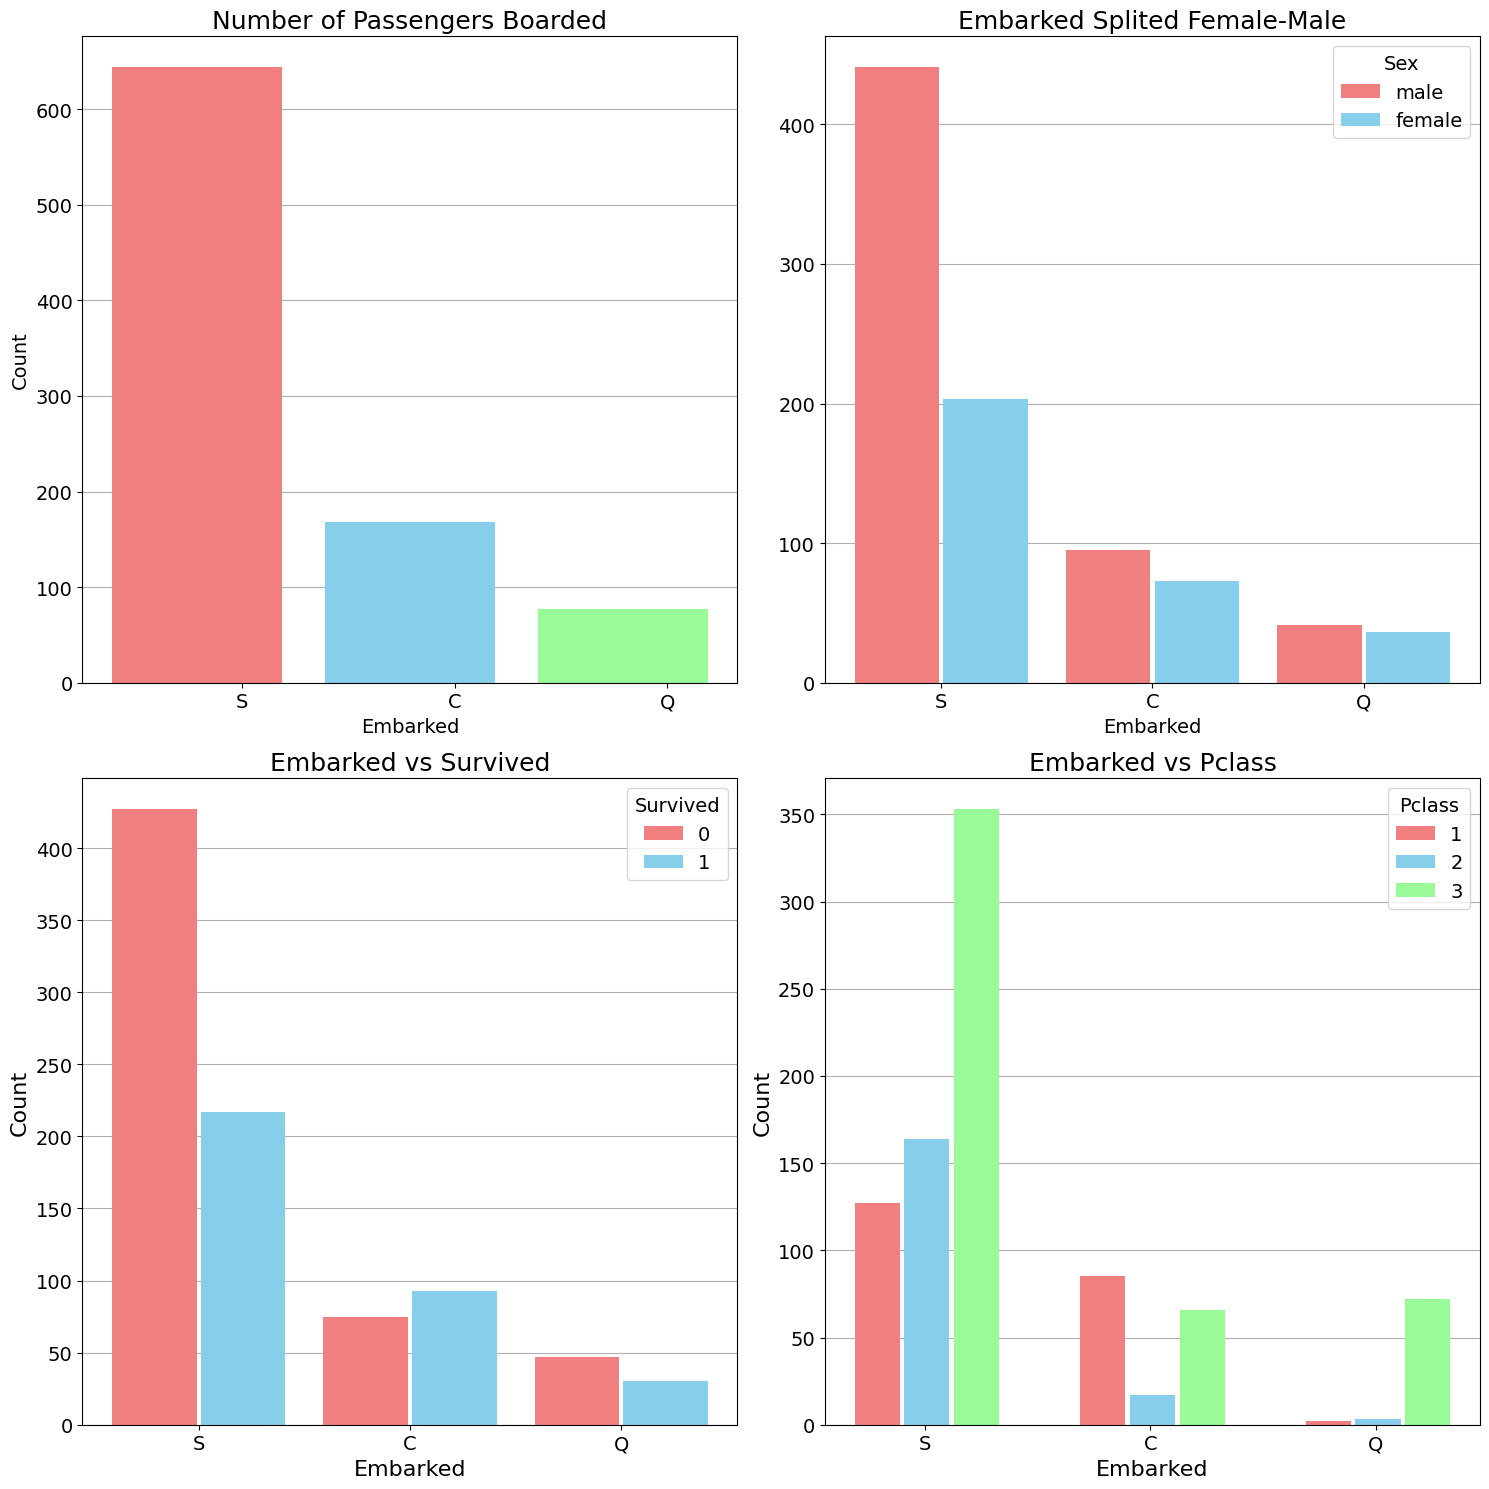

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_counts(dataset, condition1, condition2=None):
    if condition2:
        return dataset[condition1 & condition2].shape[0]
    else:
        return dataset[condition1].shape[0]
    
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

embarked_conditions = ["S", "C", "Q"]
sex_conditions = ['male', 'female']
survived_conditions = [0, 1]
pclass_conditions = [1, 2, 3]

for i in range(2):
    for j in range(2):
        if i == 0 and j == 0:
            counts = [calculate_counts(dataset, dataset["Embarked"] == e) for e in embarked_conditions]
            ax[i, j].bar(embarked_conditions, counts, width=0.8, color=["lightcoral", "skyblue", "palegreen"])
            ax[i, j].set_title("Number of Passengers Boarded", size=18)
            ax[i, j].set_xlabel("Embarked", size=14)
            ax[i, j].set_ylabel("Count", size=14)
        elif i == 0 and j == 1:
            counts_male = [calculate_counts(dataset, (dataset["Embarked"] == e) & (dataset["Sex"] == 'male')) for e in embarked_conditions]
            counts_female = [calculate_counts(dataset, (dataset["Embarked"] == e) & (dataset["Sex"] == 'female')) for e in embarked_conditions]
            ax[i, j].bar(embarked_conditions, counts_male, width=0.4, color="lightcoral")
            ax[i, j].bar(np.arange(len(embarked_conditions)) + 0.42, counts_female, width=0.4, color="skyblue")
            ax[i, j].set_title("Embarked Splited Female-Male", size=18)
            ax[i, j].set_xlabel("Embarked", size=14)
            ax[i, j].legend(["male", "female"], title="Sex", fontsize=14, title_fontsize=14)
        elif i == 1 and j == 0:
            not_survived_counts = [calculate_counts(dataset, (dataset["Embarked"] == e) & (dataset["Survived"] == 0)) for e in embarked_conditions]
            survived_counts = [calculate_counts(dataset, (dataset["Embarked"] == e) & (dataset["Survived"] == 1)) for e in embarked_conditions]
            ax[i, j].bar(embarked_conditions, not_survived_counts, width=0.4, color="lightcoral")
            ax[i, j].bar(np.arange(len(embarked_conditions)) + 0.42, survived_counts, width=0.4, color="skyblue")
            ax[i, j].set_title("Embarked vs Survived", size=18)
            ax[i, j].set_xlabel("Embarked", size=16)
            ax[i, j].set_ylabel("Count", size=16)
            ax[i, j].legend(["0", "1"], title="Survived", fontsize=14, title_fontsize=14)
        elif i == 1 and j == 1:
            pclass1_counts = [calculate_counts(dataset, (dataset["Embarked"] == e) & (dataset["Pclass"] == 1)) for e in embarked_conditions]
            pclass2_counts = [calculate_counts(dataset, (dataset["Embarked"] == e) & (dataset["Pclass"] == 2)) for e in embarked_conditions]
            pclass3_counts = [calculate_counts(dataset, (dataset["Embarked"] == e) & (dataset["Pclass"] == 3)) for e in embarked_conditions]
            ax[i, j].bar(embarked_conditions, pclass1_counts, width=0.2, color="lightcoral")
            ax[i, j].bar(np.arange(len(embarked_conditions)) + 0.22, pclass2_counts, width=0.2, color="skyblue")
            ax[i, j].bar(np.arange(len(embarked_conditions)) + 0.44, pclass3_counts, width=0.2, color="palegreen")
            ax[i, j].set_title("Embarked vs Pclass", size=18)
            ax[i, j].set_xlabel("Embarked", size=16)
            ax[i, j].set_ylabel("Count", size=16)
            ax[i, j].legend(["1", "2", "3"], title="Pclass", fontsize=14, title_fontsize=14)

for i in range(2):
    for j in range(2):
        ax[i, j].tick_params(labelsize=14)
        ax[i, j].grid(axis="y")
        ax[i, j].set_axisbelow(True)
        ax[i, j].set_xticks(np.arange(len(embarked_conditions)) + 0.39 - 0.180)
        ax[i, j].set_xticklabels(embarked_conditions)

plt.tight_layout()
plt.show()


***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

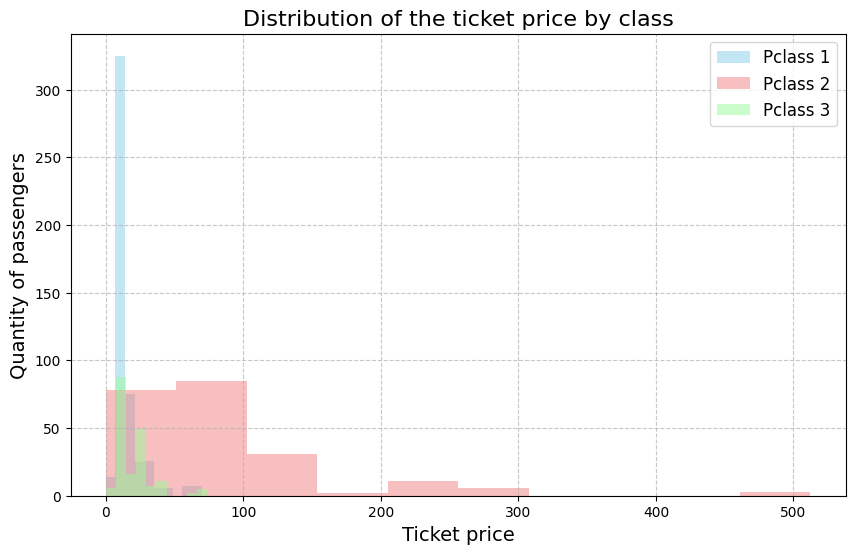

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

colors = ['skyblue', 'lightcoral', 'palegreen']
labels = ['Pclass 1', 'Pclass 2', 'Pclass 3']

for i, pclass in enumerate(dataset['Pclass'].unique()):
    plt.hist(dataset[dataset['Pclass'] == pclass]['Fare'], alpha=0.5, color=colors[i], label=labels[i])

plt.title('Distribution of the ticket price by class', fontsize=16)
plt.xlabel('Ticket price', fontsize=14)
plt.ylabel('Quantity of passengers', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Цей графік показує розподіл вартості квитка для кожного класу пасажирів. Кожна гістограма відображає кількість пасажирів у певному класі, які заплатили певну ціну за квиток. З графіка видно, що пасажири 3-го класу в основному купували дешеві квитки, тоді як пасажири 2-го та 1-го класу купували дорожчі квитки.

Прокоментуйте побудовані графіки